# Exercise 2
*You are walking in the forest and see an iris and measure: 4.8,2.5,5.3,2.4 Is this an Iris Virginica or not?*


Um herauszufinden, ob es sich bei den Daten 4.8,2.5,5.3,2.4 um eine Iris Virginica handelt, sollen zunächst alle wichtigen Imports vorgenommen werden. Anschließend wird das Iris-Dataset geladen.

Um herauszufinden, ob es sich um eine Iris Virginica handelt, benötigen wir lediglich die Messdaten, sowie deren Klassifizierungen. Dank des Datensatzes wird auch klar, welcher vorgegebene Wert was bedeutet: 
- 4.8 => Sepal Length
- 2.5 => Sepal Width
- 5.3 => Petal Length
- 2.4 => Petal Width

Die benötigten Messwerte (data) und deren Klassifizierung (target, mit 0.0 = Iris Setosa, 1.0 = Iris Versicolor und 2.0 = Iris Virginica) in ein Dataframe eingefügt, um damit im Anschluss arbeiten zu können. Mit data wird anschließend das erstellte Dataframe betrachtet.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

iris = datasets.load_iris()

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Die letzte Spalte, target, soll nun zunächst von Float zu Integer gemacht werden. Anschließend werden die Iris-Variationen, die nicht Virginica sind auf 0 gesetzt. Jene Datensätze zur Iris Virginica werden hingegen auf 1 gesetzt.

In [2]:
data["target"] = data["target"].astype(int)

data.loc[(data.target < 2),'target'] = 0
data.loc[(data.target == 2),'target'] = 1

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## Plotting
Mit dem so vorbereiteten Datensatz sollen als nächstes vier Plots für jeweils eine Spalte des Datensatzes erstellt werden. Hierfür soll jeweils eine Spalte ausgewählt werden und gemeinsam mit der target-Spalte für eine Regression genutzt werden. Durch die Nutzung von LogisticRegression() wird die gewollte Regression erstellt, mit welcher in einem nächsten Schritt dann der Graph gezeichnet werden soll. 

Dieser Graph zeigt in blau die Wahrscheinlichkeitskurve für eine Iris Virginica an, da die genutzten Daten im Datensatz auf die x-Achse und die Zugehörigkeit zu der Klasse auf der y-Achse aufgetragen werden. Damit entsteht eine Wahrscheinlichkeitskurve, welche durch eine Angabe von 150 (wegen 150 Datensätzen) durch np.linspace() geglättet wird. Die Dimensionen des Plots werden den gegebenen Werten angepasst.

Zusätzlich wird als vertikaler Graph außerdem der Messwert angegeben, welcher gemessen wurde. Der Schnittpunkt des roten und des blauen Graphen geben schließlich die Wahrscheinlichkeit an, dass es sich bei dem Messwert um eine Iris Virginica handelt. 

Der genaue Wert der Wahrscheinlichkeit wird durch die predict_proba()-Funktion erhalten, dessen zweiter Wert im Array die errechnete Wahrscheinlichkeit und damit den Schnittpunkt beider Graphen wiedergibt.

### Petal Width

#### Vorbereitung

In [3]:
X_petal_width = data["petal width (cm)"].values.reshape(-1, 1) 
y_petal_width = data["target"]

X_petal_width

regression_petal_width = LogisticRegression()
regression_petal_width.fit(X_petal_width, y_petal_width)

LogisticRegression()

#### Zeichnen

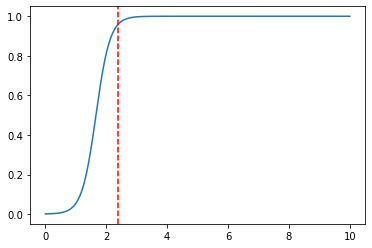

In [4]:
X_petal_width_new = np.linspace(0, 10, 150).reshape(-1, 1)
y_petal_width_proba = regression_petal_width.predict_proba(X_petal_width_new)
plt.plot(X_petal_width_new, y_petal_width_proba[:, 1])

plt.axvline(2.4, color="red", linestyle="--")

#### Wahrscheinlichkeit

In [5]:
petal_width_prob = regression_petal_width.predict_proba(np.array([[2.4]]))
petal_width_prob

array([[0.03898943, 0.96101057]])

### Petal Length

#### Vorbereitung

In [6]:
X_petal_length = data["petal length (cm)"].values.reshape(-1, 1)
y_petal_length = data["target"]

X_petal_length

regression_petal_length = LogisticRegression()
regression_petal_length.fit(X_petal_length, y_petal_length)

LogisticRegression()

#### Zeichnen

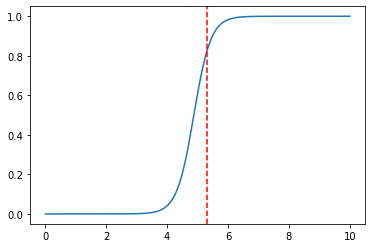

In [7]:
X_petal_length_new = np.linspace(0, 10, 150).reshape(-1, 1)
y_petal_length_proba = regression_petal_length.predict_proba(X_petal_length_new)
plt.plot(X_petal_length_new, y_petal_length_proba[:, 1])

plt.axvline(5.3, color="red", linestyle="--")

#### Wahrscheinlichkeit

In [8]:
petal_length_prob = regression_petal_length.predict_proba(np.array([[5.3]]))
petal_length_prob

array([[0.17910091, 0.82089909]])

### Sepal Length

#### Vorbereitung

In [9]:
X_sepal_length = data["sepal length (cm)"].values.reshape(-1, 1)
y_sepal_length = data["target"]

X_sepal_length

regression_sepal_length = LogisticRegression()
regression_sepal_length.fit(X_sepal_length, y_sepal_length)

LogisticRegression()

#### Zeichnen

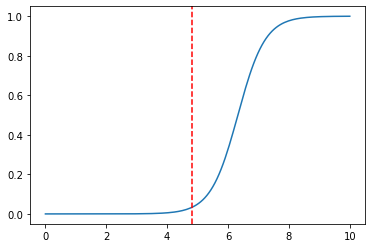

In [10]:
X_sepal_length_new = np.linspace(0, 10, 150).reshape(-1, 1)
y_sepal_length_proba = regression_sepal_length.predict_proba(X_sepal_length_new)
plt.plot(X_sepal_length_new, y_sepal_length_proba[:, 1])

plt.axvline(4.8, color="red", linestyle="--")

#### Wahrscheinlichkeit

In [11]:
sepal_length_prob = regression_sepal_length.predict_proba(np.array([[4.8]]))
sepal_length_prob

array([[0.96762366, 0.03237634]])

### Sepal Width

#### Vorbereitung

In [12]:
X_sepal_width = data["sepal width (cm)"].values.reshape(-1, 1)
y_sepal_width = data["target"]

X_sepal_width

regression_sepal_width = LogisticRegression()
regression_sepal_width.fit(X_sepal_width, y_sepal_width)

LogisticRegression()

#### Zeichnen

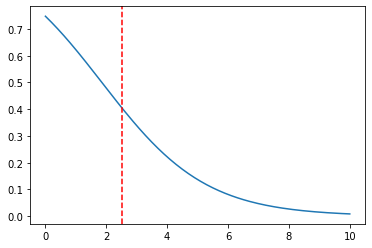

In [13]:
X_sepal_width_new = np.linspace(0, 10, 150).reshape(-1, 1)
y_sepal_width_proba = regression_sepal_width.predict_proba(X_sepal_width_new)
plt.plot(X_sepal_width_new, y_sepal_width_proba[:, 1])

plt.axvline(2.5, color="red", linestyle="--")

#### Wahrscheinlichkeit

In [14]:
sepal_width_prob = regression_sepal_width.predict_proba(np.array([[2.5]]))
sepal_width_prob

array([[0.5933503, 0.4066497]])

## Ergebnis
Die so erhaltenen Wahrscheinlichkeiten können addiert und durch die Anzahl an Summanden geteilt werden, um die Gesamtwahrscheinlichkeit dafür zu erhalten, ob es sich bei der gemessenen Pflanze um eine Iris Virginica handelt:

#### Wahrscheinlichkeit auf Iris Virginica: Petal Width

In [15]:
petal_width_prob[:, 1][0]

0.9610105664849115

#### Wahrscheinlichkeit auf Iris Virginica: Petal Length

In [16]:
petal_length_prob[:, 1][0]

0.8208990867977308

#### Wahrscheinlichkeit auf Iris Virginica: Sepal Length

In [17]:
sepal_length_prob[:, 1][0]

0.0323763367786129

#### Wahrscheinlichkeit auf Iris Virginica: Sepal Width

In [18]:
sepal_width_prob[:, 1][0]

0.40664969574021453

#### Gesamtwahrscheinlichkeit auf Iris Virginica

In [20]:
iris_virginica_prob = (petal_width_prob[:, 1] + petal_length_prob[:, 1] + sepal_length_prob[:, 1] + sepal_width_prob[:, 1]) / 4
iris_virginica_prob[0]

0.5552339214503674